<a href="https://colab.research.google.com/github/maa1and/maa1and/blob/main/SC104_Week7_271021_Mana_Asano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
from re import X
#EX7_1 BMIを計算する関数を作る
def calc_bmi(weight, height):
  bmi = weight/(height/100)**2
  if 19<bmi<25: #BMIが19-25の場合はnomalと表示
    return f'BMI: {bmi} nomal' #fで文字列に直接変数を埋め込む
  else:
    return f'BMI:{bmi}'
print(calc_bmi(63,171))
#BMIが適正範囲でない時にはnomalと表示されないことを確認

BMI: 21.545090797168363 nomal


In [37]:
#EX7_2 リストに含まれる数値の平均を求める関数を作る
def calc_mean(valuelist):
  mean = sum(valuelist)/len(valuelist)
  return f'mean: {mean}'

print(calc_mean([0.5,1.5, 2.5, 3.5]))

#EX7_3 str型リストをfloat型リストにして返す関数を作る
def converter(strlist):
  floatlist = []
  for i in strlist:
    floatlist.append(float(i)) #リストの要素をそれぞれfloat型に変換して別のリストに格納
  return floatlist

print(converter(['0.5', '1.5', '2.5', '3.5']))

#Extra
def combine(numlist): #上２つの関数を組み合わせる
  a = converter(numlist)
  b = calc_mean(a)
  return(b)

print(combine(['0.5', '1.5', '2.5', '3.5']))

mean: 2.0
[0.5, 1.5, 2.5, 3.5]
mean: 2.0


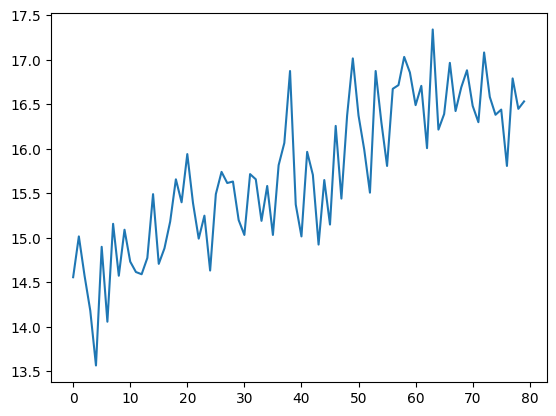

In [45]:
#EX7_4 80年分の気温データから各年の平均気温を求め、グラフを描画する
import matplotlib.pyplot as plt

def calc_average(valuelist): #EX7-2の平均を求める関数
  result = sum(valuelist)/len(valuelist)
  return result

def str2float(strlist): #EX7-3のstr→floatに変換する関数
  floatlist = []
  for i in strlist:
    floatlist.append(float(i))
  return floatlist

f = open('/content/TokyoTemp1941-2020.csv')
avglist = [] #80年分の平均を格納するリスト
for line in f: #1行ごとに処理
  content = line.split(',')
  a = str2float(content)
  b = calc_average(a)
  avglist.append(b)
f.close()
plt.plot(avglist)
plt.show()

In [50]:
#EX7_5_a len()と同じ働きをする関数を作る
def length_counter(valuelist):
  sum = 0 #文字数カウンター
  for i in valuelist:
    sum += 1
  return f'length of list: {sum}'

print(length_counter([1,2,3,4,5]))
#リストに含まれる要素の数を正しくカウントできることを確認

#EX7_5_b split()と同じ働きをする関数を作る
def split_func(string, delimiter):
  splitlist = []
  character = "" #空文字を初期値に設定
  for i in string:
    if i != delimiter: #stringのi番目の文字がdelimiterでない時、characterにiを追加
      character += i
    else:
      splitlist.append(character) #stringのi番目の文字がdelimiterの時、characterをリストに追加した上で初期化
      character = ""
  splitlist.append(character)
  return splitlist

print(split_func('abc def', ' '))
#文字列を空白で区切ることができた

length of list: 5
['abc', 'def']


-1
[0, -1, -2, -1, 0, -1, 0, 1, 2, 1, 0]
last value: -48


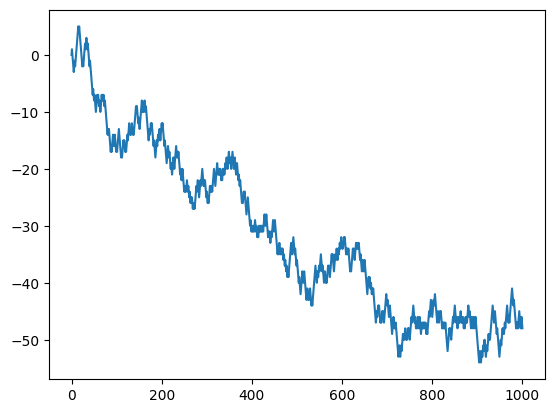

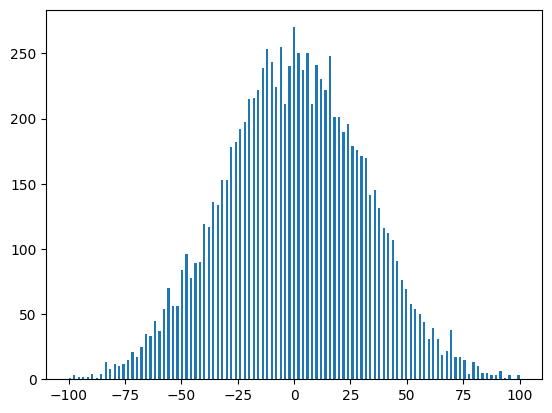

In [60]:
#EX7_6 任意のaについてa+1かa-1をランダムに計算する関数を作る
import random
import matplotlib.pyplot as plt

def addsubone(a):
  choice = random.choice([-1,1])
  a += choice
  return a

print(addsubone(0))
#a=0の時、ランダムに-1か1が表示されることを確認

#EX7_7_a 初期値nをランダムにn-1かn+1してnを更新するという計算をm回繰り返す関数を作る
def randomwalk(initpos, rwlen): #初期値、回数
  randomlist = [] #計算結果を格納
  default = initpos
  randomlist.append(default) #初期値をリストに追加
  for i in range(rwlen):
    choice = random.choice([-1, 1])
    default += choice #defaultを更新
    randomlist.append(default)
  return randomlist
print(randomwalk(0, 10))

#EX7_7_b EX7_7_aを1000回繰り返した結果をグラフにし、最後の数字を表示する
randomlist = randomwalk(0,1000)
print('last value:', randomlist[-1]) #リストの最後の要素を取得
plt.plot(randomlist) #線グラフ描画
plt.show()

#EX7_7_c EX7_7_bを10000回繰り返し、最後の数字からヒストグラムを描画する
lastlist = [] #最後の数字を格納
for i in range(10000):
  randomlist = randomwalk(0, 1000)
  lastlist.append(randomlist[-1])
plt.hist(lastlist, bins=201, range=(-100,100)) #ヒストグラム描画
plt.show()

In [86]:
#EX7_8 値が1のとき、基準値を生成した乱数が下回った場合に値を2に更新する関数を作る
import random
def recover(beforelist, recoverprob):
  afterlist = []
  for i in beforelist:
    if i == 1: #値が1の場合
      a = random.random() #乱数aを生成
      if a <= recoverprob: #aが基準値以下の場合
        afterlist.append(2) #値を1→2に更新してリストに格納
      else:
        afterlist.append(1)
    else: #値が1でない場合
      afterlist.append(i)
  return afterlist

print(recover([0,1,0,1],0.5))
#見本通りの結果が出力された

#EX7_9 リストからランダムに選ばれた2つの値のうち1つが1のとき、もう1つの値も1に更新する関数を作る
def infect(peoplelist, infectprob):
  a = random.randint(0, len(peoplelist)-1) #peoplelistからランダムに選ばれた個体a,bのインデックス
  b = random.randint(0, len(peoplelist)-1)
  if peoplelist[a] == 1 and peoplelist[b] == 0: #aが感染していてbが感染していないとき
    randomprob = random.random()
    if randomprob <= infectprob: #乱数がinfectprob以下の場合、bが感染する
      peoplelist[b] = 1
  elif peoplelist[b] == 1 and peoplelist[a] == 0: #以下同様
    randomprob = random.random()
    if randomprob <= infectprob:
      peoplelist[a] = 1
  return peoplelist
print(infect([0,1,0,1],0.5))
#見本通りの結果が出力された

[0, 2, 0, 1]
[1, 1, 0, 1]


In [116]:
#EX7_10 Chat botの作成
import random
def get_user_name(): #名前と敬称を選ぶ関数
  name = input('Print your name: ')
  print('Choose how you want to be called')
  print('1.san')
  print('2.kun')
  print('3.chan')
  honorifictdict = {'1':'san', '2':'kun', '3':'chan'}
  honorific_choice = input('Choose a number(1/2/3): ')
  honorific = honorifictdict[honorific_choice]
  nameimfo = name+honorific #名前+敬称をまとめる
  return nameimfo

def get_random_message(): #リストの中からランダムに言葉を返す関数
    random_reply = random.choice(['What?', 'Haha!', 'Omg!'])
    return random_reply

def generate_response(message, user_name): #特定のキーワードが入力されたら、それに対応する言葉を返す関数
  reply_dict = {'hello': f"Hello, {user_name}! Let's have a great day.",
                'thank you': f"Your welcome, {user_name}."} #特定キーワードと、それに対応するメッセージを格納
  if 'hello' in message:
    bot_reply = reply_dict['hello']
  elif 'thank you' in message:
    bot_reply = reply_dict['thank you']
  return bot_reply #辞書の中身が増えた時にif文も変更しないといけないので改善すべきだと思う

def chat(): #会話を処理する関数
  user_name = get_user_name()
  while True: #breakがくるまで以下の処理をループし続ける
    message = input(f'{user_name}: ') #メッセージの入力
    if 'hello' in message or 'thank you' in message: #特定キーワードが含まれる場合
      reply = (generate_response(message, user_name))
      print(f'Bot: {reply}')
    elif 'good bye' in message or 'see you' in message: #終了の合図が含まれる場合
      print(f"Bot: Goodbye, {user_name}. Let's talk again.")
      break #プログラムを終了
    else: #特定キーワードが含まれない場合
      reply = (get_random_message())
      print(f'Bot: {reply}')

chat()
#見本通りの出力は得られたが、プログラムを改変したいときに柔軟性がないと思う

Print your name: Mayu
Choose how you want to be called
1.san
2.kun
3.chan
Choose a number(1/2/3): 3
Mayuchan: hello
Bot: Hello, Mayuchan! Let's have a great day.
Mayuchan: ahahahah
Bot: Omg!
Mayuchan: see you
Bot: Goodbye, Mayuchan. Let's talk again.
